# import libraries

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# read dataset

In [2]:
# Load the iris dataset
iris = load_iris()

data = iris.data
target = iris.target

print(f"data.shape: {data.shape}")
print(f"target.shape: {target.shape}")

data.shape: (150, 4)
target.shape: (150,)


In [3]:
# check targets
np.unique(target)

array([0, 1, 2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"X_train.shape: {X_train_scaled.shape}")
print(f"X_test.shape: {X_test_scaled.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (100, 4)
X_test.shape: (50, 4)
y_train.shape: (100,)
y_test.shape: (50,)


# plot dataset

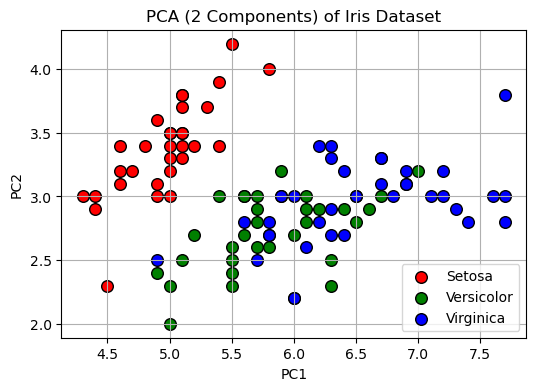

In [12]:
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(6, 4))

for class_value, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(X_train[y_train == class_value, 0],
                X_train[y_train == class_value, 1],
                c=color,
                label=label,
                edgecolors='k',
                s=70)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 Components) of Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()

# train the model

In [16]:
for metric in ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'mahalanobis']:
    print(f"metric = {metric}")
    if metric == 'mahalanobis':
        cov = np.cov(X_train_scaled, rowvar=False)
        VI = np.linalg.inv(cov)
        clf = KNeighborsClassifier(n_neighbors=3, metric=metric, metric_params={'V': cov, 'VI': VI})
    else:
        clf = KNeighborsClassifier(n_neighbors=3, metric=metric)
    clf.fit(X_train_scaled, y_train)
    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)
    print("Train Accuracy:", train_score)
    print("Test Accuracy:", test_score)
    print("#" * 10)
    print()

metric = euclidean
Train Accuracy: 0.95
Test Accuracy: 0.98
##########

metric = manhattan
Train Accuracy: 0.93
Test Accuracy: 0.98
##########

metric = cosine
Train Accuracy: 0.9
Test Accuracy: 0.9
##########

metric = chebyshev
Train Accuracy: 0.95
Test Accuracy: 0.94
##########

metric = mahalanobis
Train Accuracy: 0.92
Test Accuracy: 0.88
##########



In [7]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
test_score = clf.score(X_test_scaled, y_test)
test_score

0.98

In [11]:
test_data = np.array([[5.5, 2.4, 3.8, 1.1]])
test_data_scaled = scaler.transform(test_data)
clf.predict(test_data_scaled)

array([1])